In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
SEED = 42
DATA_DIR = "/content/drive/MyDrive/new work/Dataset/train"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
VAL_SPLIT = 0.2
NUM_CLASSES = 4
EPOCHS = 20

tf.random.set_seed(SEED)
np.random.seed(SEED)

In [4]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=VAL_SPLIT
)

train_it = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)

val_it = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

class_names = list(train_it.class_indices.keys())
print("\nClass indices:", train_it.class_indices)
print("Class names:", class_names)

Found 6079 images belonging to 4 classes.
Found 1518 images belonging to 4 classes.

Class indices: {'Hyperpigmentation': 0, 'Nail fungus': 1, 'clubbing': 2, 'normal': 3}
Class names: ['Hyperpigmentation', 'Nail fungus', 'clubbing', 'normal']


In [5]:
batchX, batchy = next(train_it)
print(f"\nBatch shape={batchX.shape}, min={batchX.min():.3f}, max={batchX.max():.3f}")



Batch shape=(32, 224, 224, 3), min=0.000, max=1.000


In [6]:
backbone = VGG16(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
for layer in backbone.layers:
    layer.trainable = True

x = backbone.output
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=backbone.input, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,596 (68.38 MB)

 Trainable params: 17,926,596 (68.38 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_it,
    validation_data=val_it,
    epochs=EPOCHS
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 2340s 12s/step - accuracy: 0.3434 - loss: 1.3697 - val_accuracy: 0.6502 - val_loss: 1.0033
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 92s 484ms/step - accuracy: 0.6007 - loss: 0.9652 - val_accuracy: 0.8320 - val_loss: 0.5114
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 95s 500ms/step - accuracy: 0.8058 - loss: 0.5480 - val_accuracy: 0.7760 - val_loss: 0.5762
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 96s 507ms/step - accuracy: 0.8801 - loss: 0.3435 - val_accuracy: 0.9565 - val_loss: 0.1624
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 97s 510ms/step - accuracy: 0.9233 - loss: 0.2182 - val_accuracy: 0.9269 - val_loss: 0.1835
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 98s 514ms/step - accuracy: 0.9548 - loss: 0.1423 - val_accuracy: 0.9723 - val_loss: 0.0850
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 98s 515ms/step - accuracy: 0.9590 - loss: 0.1269 - val_accuracy: 0.8715 - val_loss: 0.3952
Epoch 8/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 98s 515ms/step - accuracy: 0.9695 - loss: 0

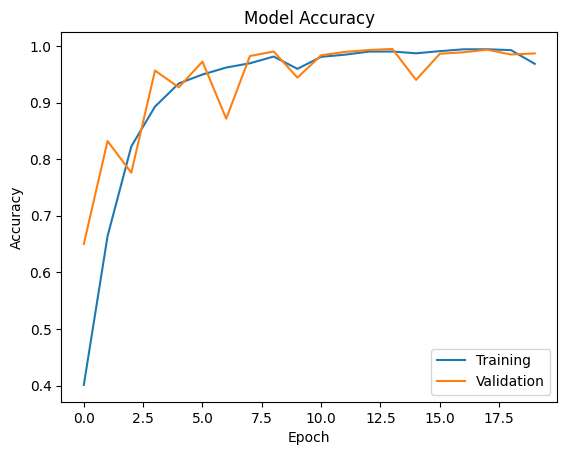

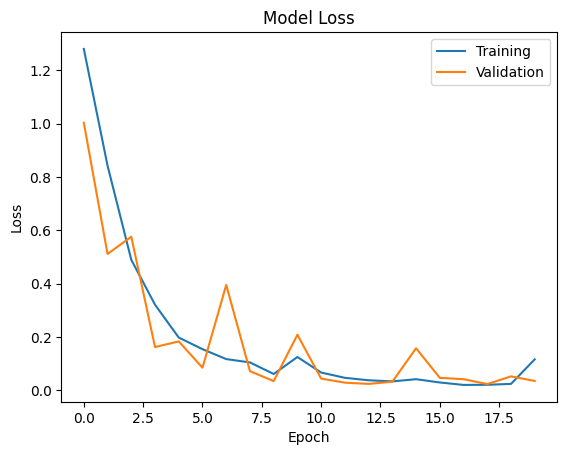

In [9]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="upper right")
plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step


<Figure size 640x480 with 0 Axes>

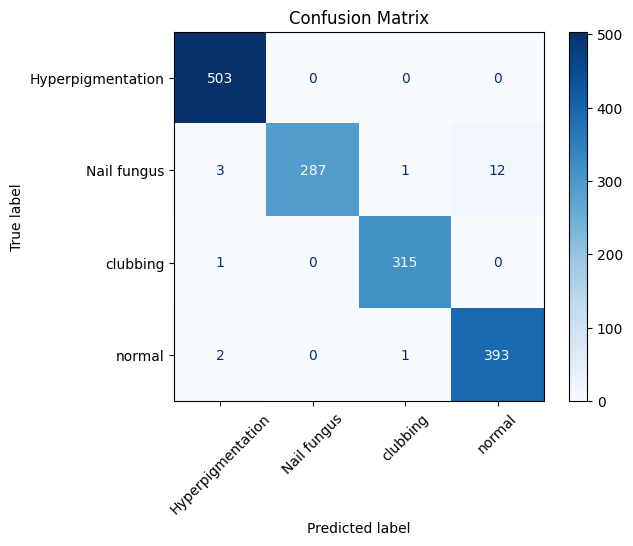


Classification Report:

                   precision    recall  f1-score   support

Hyperpigmentation       0.99      1.00      0.99       503
      Nail fungus       1.00      0.95      0.97       303
         clubbing       0.99      1.00      1.00       316
           normal       0.97      0.99      0.98       396

         accuracy                           0.99      1518
        macro avg       0.99      0.98      0.99      1518
     weighted avg       0.99      0.99      0.99      1518



In [10]:
val_it.reset()
Y_pred = model.predict(val_it, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_it.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure()
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step


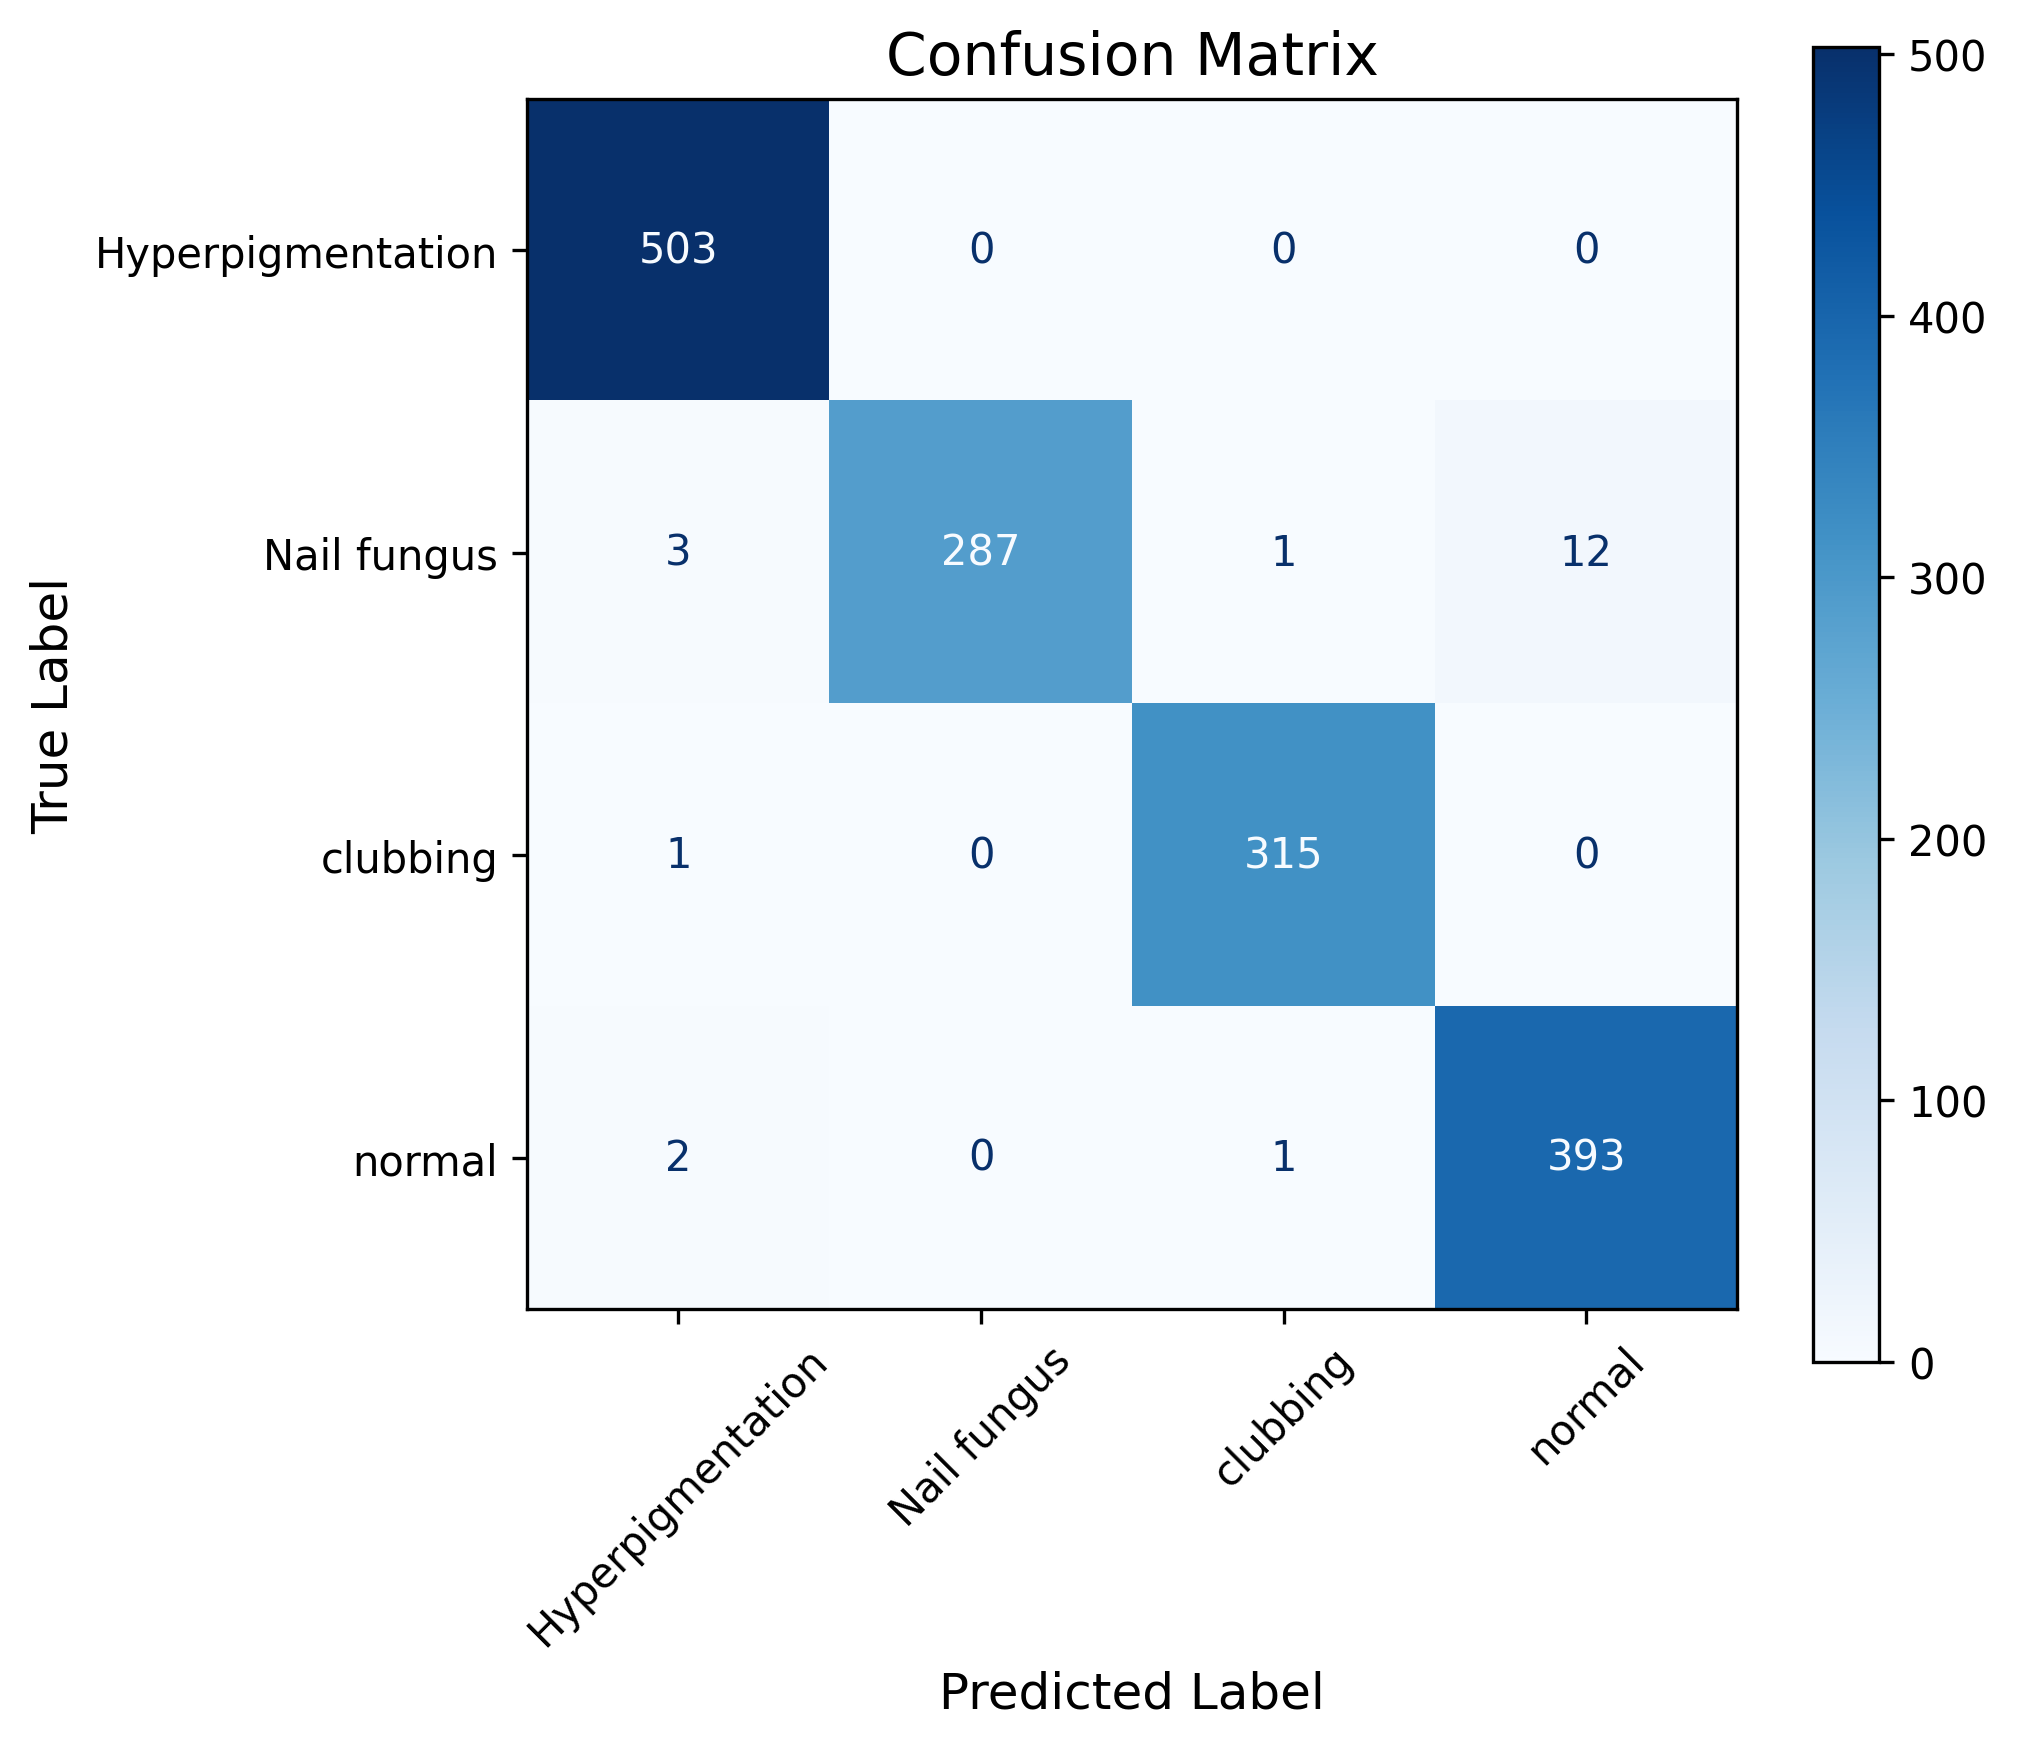


Classification Report:

                   precision    recall  f1-score   support

Hyperpigmentation     0.9882    1.0000    0.9941       503
      Nail fungus     1.0000    0.9472    0.9729       303
         clubbing     0.9937    0.9968    0.9953       316
           normal     0.9704    0.9924    0.9813       396

         accuracy                         0.9868      1518
        macro avg     0.9881    0.9841    0.9859      1518
     weighted avg     0.9871    0.9868    0.9868      1518


Classification Report:

                   precision    recall  f1-score   support

Hyperpigmentation       0.99      1.00      0.99       503
      Nail fungus       1.00      0.95      0.97       303
         clubbing       0.99      1.00      1.00       316
           normal       0.97      0.99      0.98       396

         accuracy                           0.99      1518
        macro avg       0.99      0.98      0.99      1518
     weighted avg       0.99      0.99      0.99      1518



In [11]:
# Reset generator
val_it.reset()

# Predictions
Y_pred = model.predict(val_it, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_it.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# High-quality figure
fig, ax = plt.subplots(figsize=(7, 6), dpi=300)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names
)

disp.plot(
    ax=ax,
    cmap="Blues",
    xticks_rotation=45,
    colorbar=True
)

ax.set_title("Confusion Matrix", fontsize=14)
ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)

plt.tight_layout()
plt.show()

# Classification report (console only)
print("\nClassification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
))

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

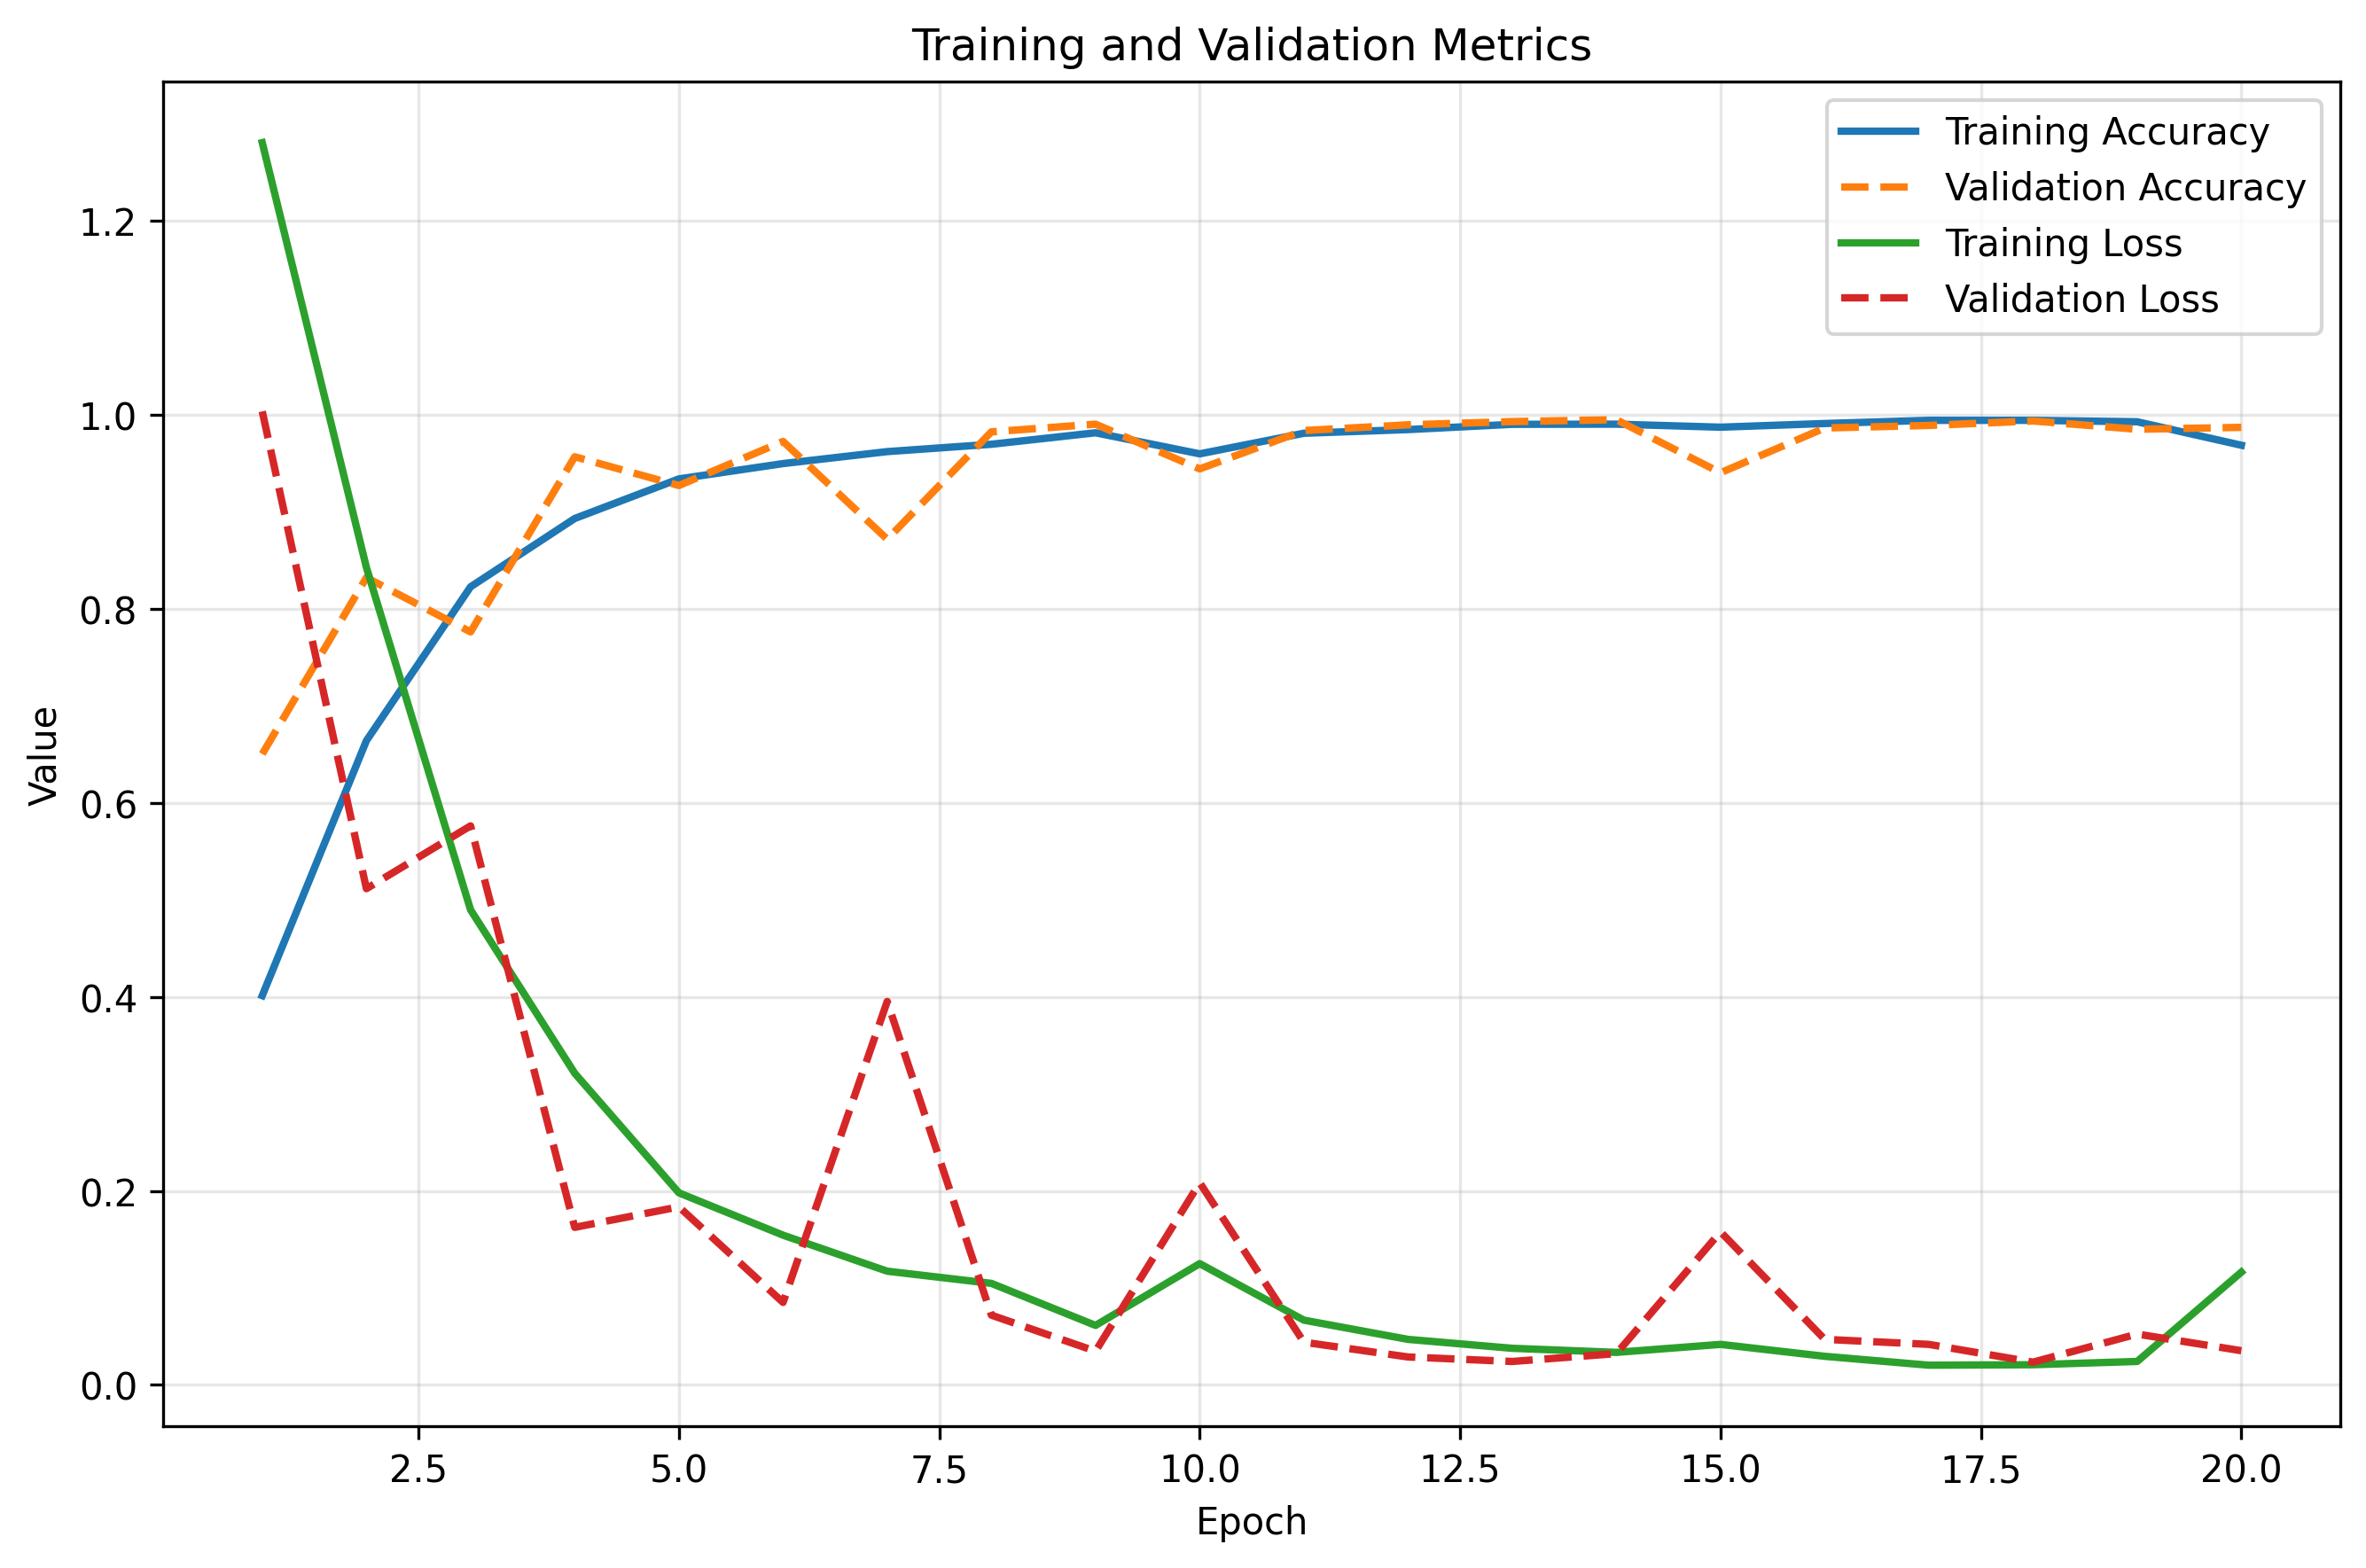

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(9, 6), dpi=300)

plt.plot(epochs, history.history["accuracy"], label="Training Accuracy", linewidth=2)
plt.plot(epochs, history.history["val_accuracy"], label="Validation Accuracy", linewidth=2, linestyle="--")
plt.plot(epochs, history.history["loss"], label="Training Loss", linewidth=2)
plt.plot(epochs, history.history["val_loss"], label="Validation Loss", linewidth=2, linestyle="--")

plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Training and Validation Metrics")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("training_validation_all_metrics.png", dpi=300, bbox_inches="tight")
plt.savefig("training_validation_all_metrics.pdf", bbox_inches="tight")
plt.show()


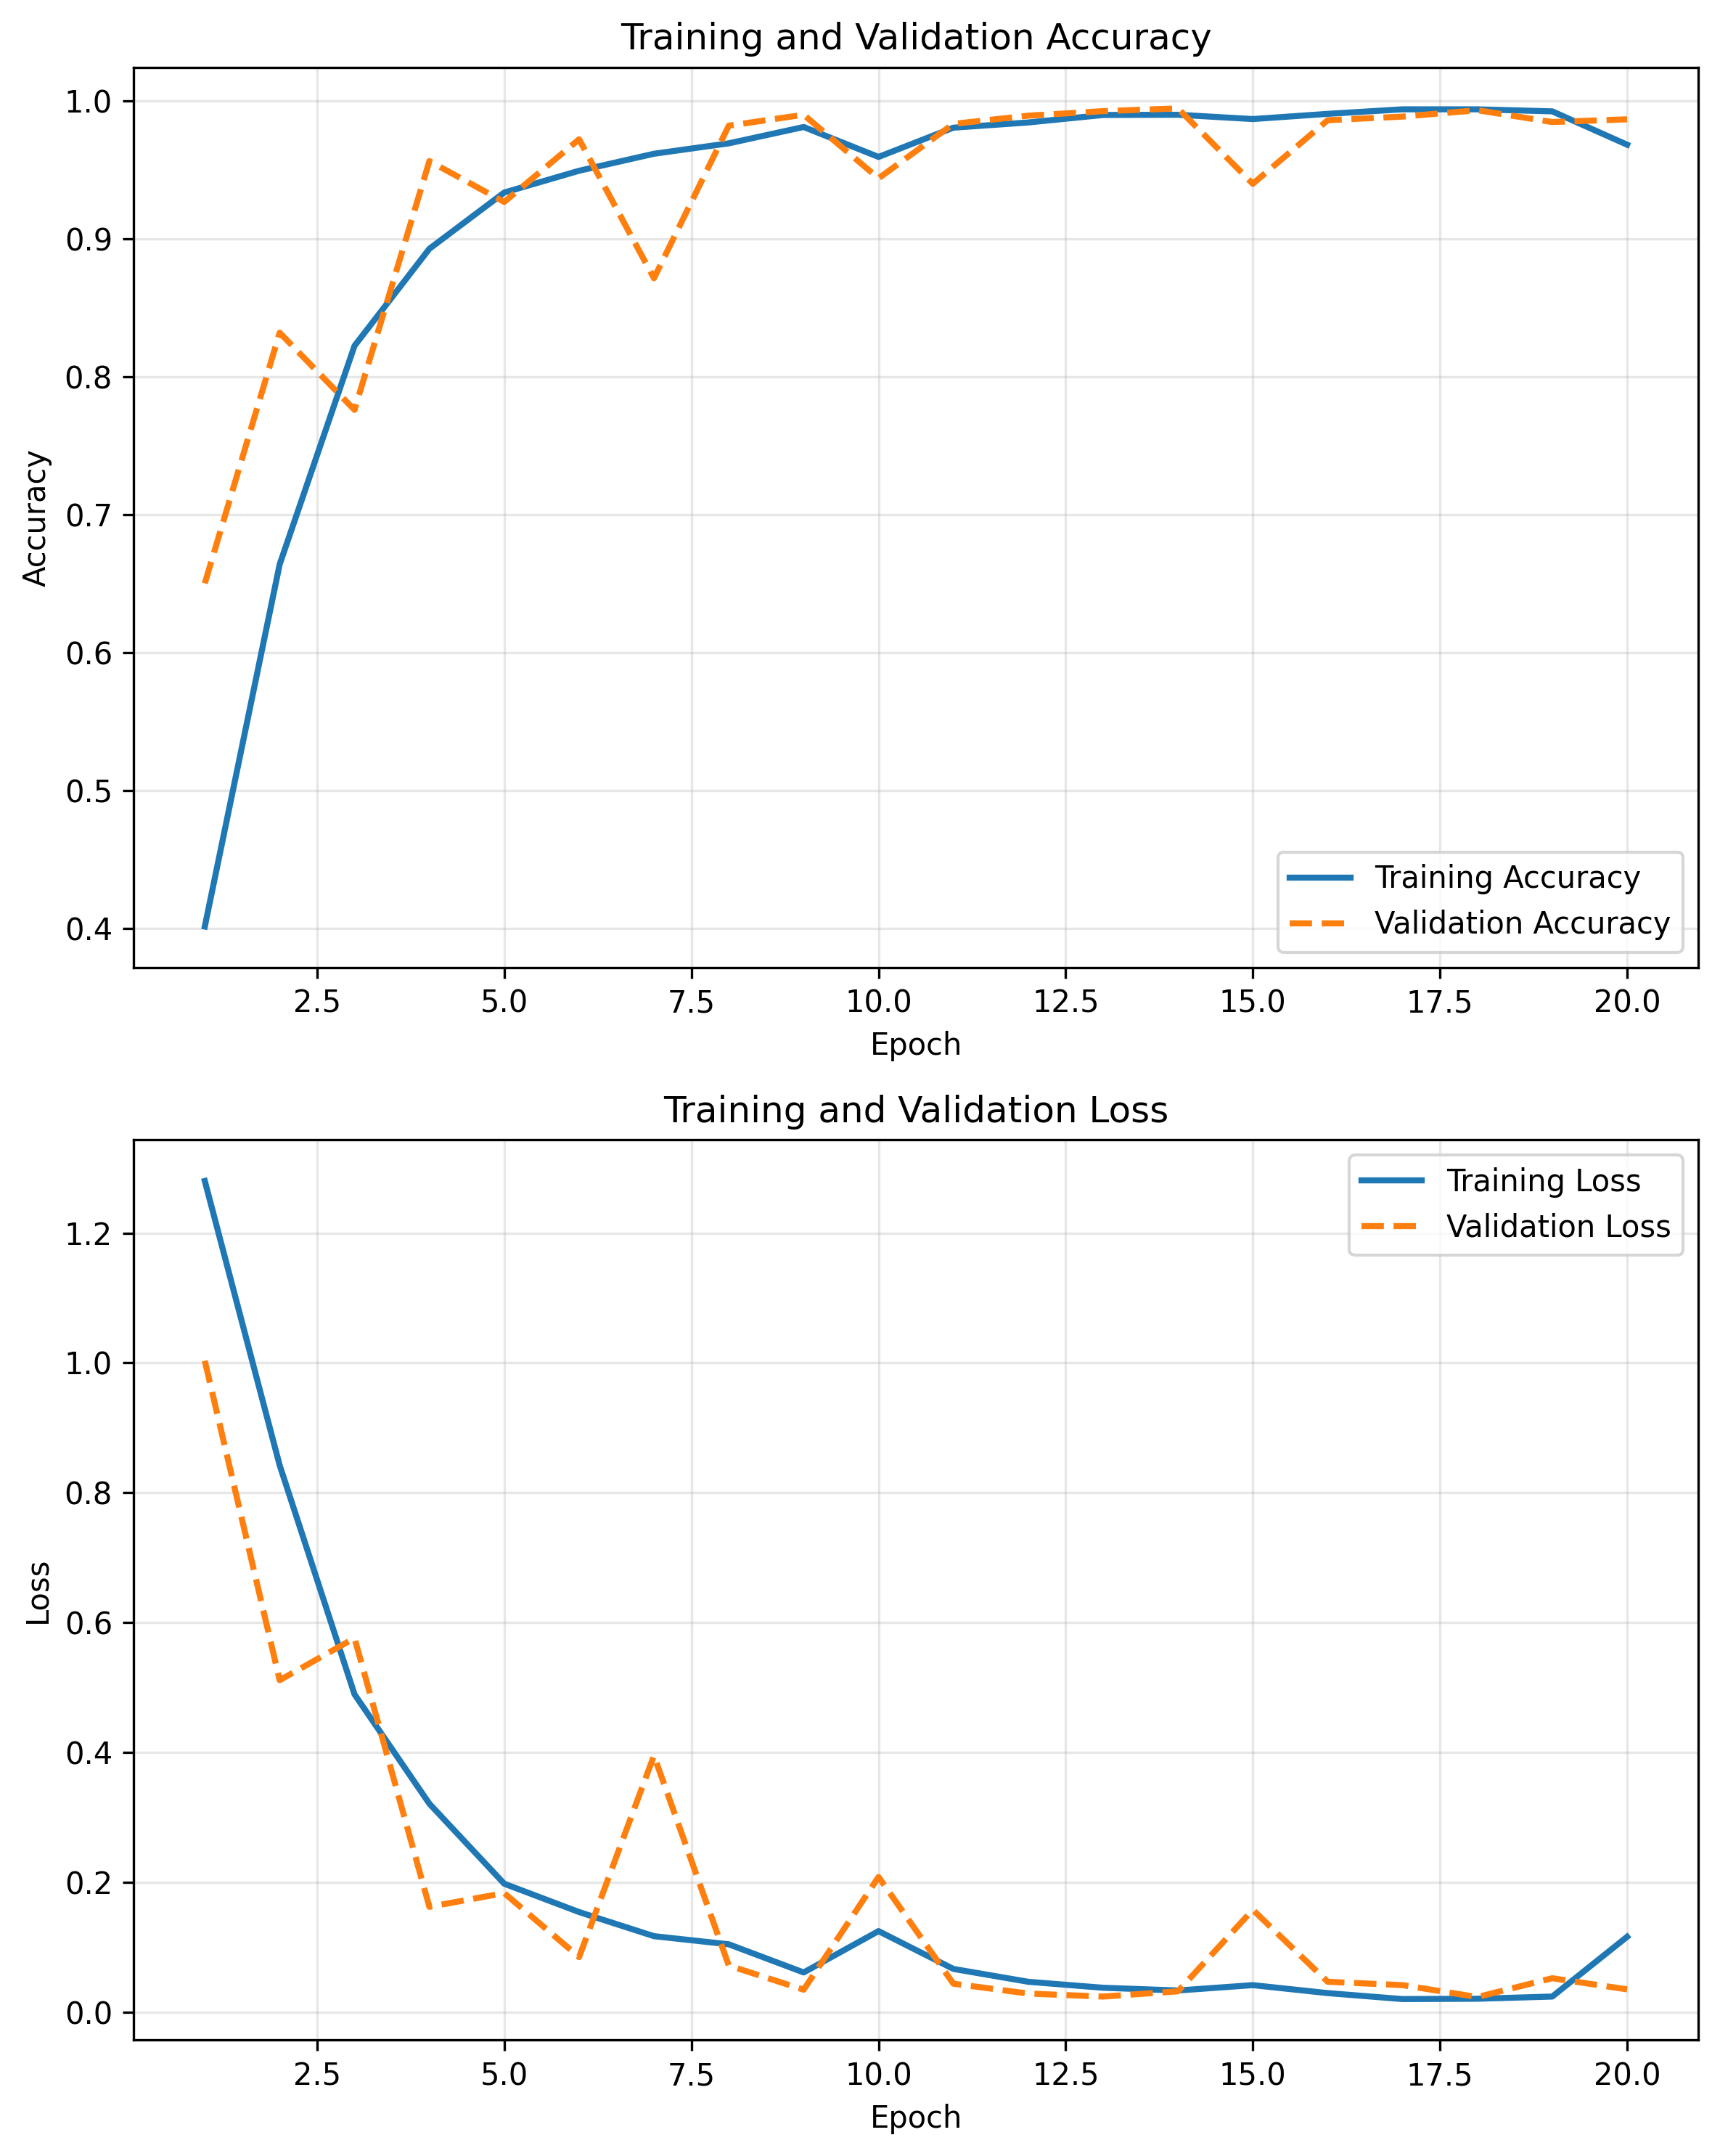

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 10), dpi=300)

# -------- Accuracy --------
plt.subplot(2, 1, 1)
plt.plot(epochs, history.history["accuracy"], label="Training Accuracy", linewidth=2)
plt.plot(epochs, history.history["val_accuracy"], label="Validation Accuracy", linewidth=2, linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)

# -------- Loss --------
plt.subplot(2, 1, 2)
plt.plot(epochs, history.history["loss"], label="Training Loss", linewidth=2)
plt.plot(epochs, history.history["val_loss"], label="Validation Loss", linewidth=2, linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("training_validation_metrics.png", dpi=300, bbox_inches="tight")
plt.savefig("training_validation_metrics.pdf", bbox_inches="tight")
plt.show()
